In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/facial-age-estimation/

/content/drive/MyDrive/facial-age-estimation


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/facial-age-estimation/src')

In [4]:
ls

data/  README.txt  requirements.txt  src/  weights/


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import math
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.modules.utils import _triple

from models.r21d_mini import MiniR2Plus1D
from evaluation.evaluate_vcop import evaluate_vcop_all
from models.vcop_head import VCOPN
from config import VCOPConfig
from train.train_vcop import train_vcop

In [6]:
ls

data/  README.txt  requirements.txt  src/  weights/


In [7]:
config = VCOPConfig()
X_train = torch.load(config.train_X_path)
y_train = torch.load(config.train_y_path)
X_val = torch.load(config.val_X_path)
y_val = torch.load(config.val_y_path)
X_test = torch.load(config.test_X_path)
y_test = torch.load(config.test_y_path)

In [ ]:
import itertools
config.num_epochs = 50
tuple_len = 4
all_perms = list(itertools.permutations(range(tuple_len)))  # 길이 4의 순열
model = train_vcop(X_train, y_train, X_val, y_val, config,all_perms)

[Epoch 1] 🏋️ Train Loss: 1.8906, Acc: 0.0598 | 🔍 Val Loss: 1.9805, Acc: 0.0552
✅ 모델 저장됨: vcop_mini.pth
[Epoch 2] 🏋️ Train Loss: 1.7757, Acc: 0.0958 | 🔍 Val Loss: 1.8264, Acc: 0.0946
✅ 모델 저장됨: vcop_mini.pth
[Epoch 3] 🏋️ Train Loss: 1.6478, Acc: 0.1546 | 🔍 Val Loss: 1.7744, Acc: 0.1036
✅ 모델 저장됨: vcop_mini.pth
[Epoch 4] 🏋️ Train Loss: 1.5593, Acc: 0.1959 | 🔍 Val Loss: 1.6528, Acc: 0.1622
✅ 모델 저장됨: vcop_mini.pth
[Epoch 5] 🏋️ Train Loss: 1.4975, Acc: 0.2112 | 🔍 Val Loss: 1.8166, Acc: 0.1419
[Epoch 6] 🏋️ Train Loss: 1.4359, Acc: 0.2393 | 🔍 Val Loss: 1.7353, Acc: 0.1273
[Epoch 7] 🏋️ Train Loss: 1.3920, Acc: 0.2584 | 🔍 Val Loss: 1.6355, Acc: 0.2050
✅ 모델 저장됨: vcop_mini.pth
[Epoch 8] 🏋️ Train Loss: 1.3339, Acc: 0.2820 | 🔍 Val Loss: 1.8354, Acc: 0.1532
[Epoch 9] 🏋️ Train Loss: 1.2850, Acc: 0.2990 | 🔍 Val Loss: 1.8729, Acc: 0.1509
[Epoch 10] 🏋️ Train Loss: 1.2305, Acc: 0.3326 | 🔍 Val Loss: 1.6694, Acc: 0.1858
[Epoch 11] 🏋️ Train Loss: 1.1896, Acc: 0.3472 | 🔍 Val Loss: 1.6199, Acc: 0.2207
✅ 모델 저장됨:


🧪 [VCOP 평가 결과]
✅ Top-1 정확도        : 0.1974
✅ Top-3 정확도     : 0.4814
📐 평균 Kendall's Tau : 0.4207
📐 평균 Spearman Rho  : 0.4923
🎯 완전 일치 비율     : 0.1974


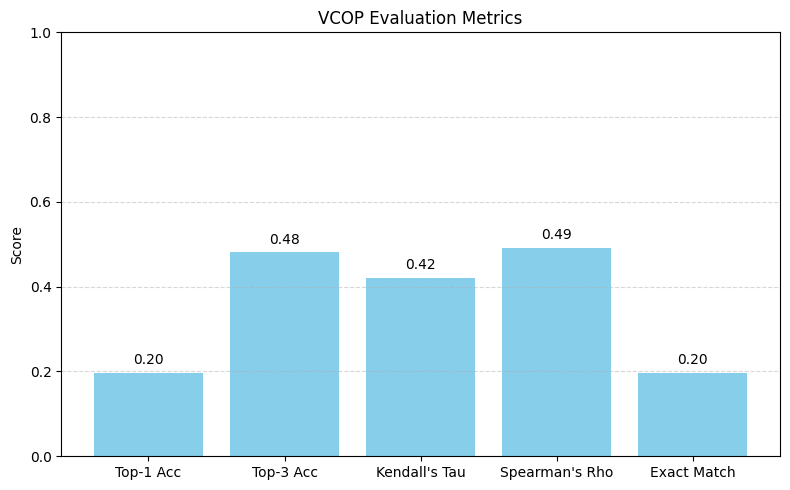

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base = MiniR2Plus1D()
best_model = VCOPN(base_network=base, feature_size=config.feature_size, tuple_len=config.tuple_len).to(device)
best_model.load_state_dict(torch.load(f"{config.save_dir}/{config.model_name}"))
results = evaluate_vcop_all(best_model, X_test, y_test, config)